# Assignment

$Analytical \ solution: \ y=\frac{2xe^{2x}-e^{2x}+c_1}{e^{2x}}$

$Steps:$

$y'+2y=4x - first\:order\:linear\:ordinary\:differential\:equation$

$1)\:Solve\:complementary\:equation\: y'+2y = 0:$

$y_1 = e^{-2x}$

$2)\:Make\:substitution:$

$y = uy_1$

$y' = u'e^{-2x}-2ue^{-2x}$

$3)\:Solve\:equation\:and\:find\:general\:solution:$

$u'e^{-2x}=4x$

$u = 2e^{2x}-e^{2x}+c_1$

$y=\frac{2xe^{2x}-e^{2x}+c_1}{e^{2x}}$


## IVP
$Find \ constant \ value:$

$c_1 = y_0e^{2x_0}-2x_0e^{2x_0}+e^{2x_0}$

$Find \ exact \ solution \ with \ respect \ to \ constant \ value$

$y=\frac{2xe^{2x}-e^{2x}+c_1}{e^{2x}}=\frac{2xe^{2x}-e^{2x}+y_0e^{2x_0}-2x_0e^{2x_0}+e^{2x_0}}{e^{2x}}\ \ (1)$




In [1]:
import numpy as np
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

sns.set()
%config InlineBackend.figure_format='retina'

## Functions

$y'=f(x,y)=-2y+4x$


In [2]:
def f(x,y):
    return -2*y+4*x

$(1) \ y=\frac{2xe^{2x}-e^{2x}+c_1}{e^{2x}}=\frac{2xe^{2x}-e^{2x}+y_0e^{2x_0}-2x_0e^{2x_0}+e^{2x_0}}{e^{2x}}$

In [3]:
def y_ivp(x,x0,y0):
    c1 = y0*np.exp(2*x0)-2*x0*np.exp(2*x0)+np.exp(2*x0)
    return (2*x*np.exp(2*x)-np.exp(2*x)+c1)/np.exp(2*x)

## Analytical method

The analytical solution and plot of the equation: $y=\frac{2xe^{2x}-e^{2x}+c_1}{e^{2x}}$

In [4]:
def exact(x0,y0,xn,step):
    x_arr = np.arange(x0,xn+step,step)
    y = []
    for x in x_arr:
        y.append(y_ivp(x,x0,y0)) 
    return x_arr,y

def y_ivp_plot(y0,x0,xn,step):
    x_arr,y = exact(x0,y0,xn,step)
    plt.figure(figsize=(8,8))    
    plt.plot(x_arr,y)
    plt.show()

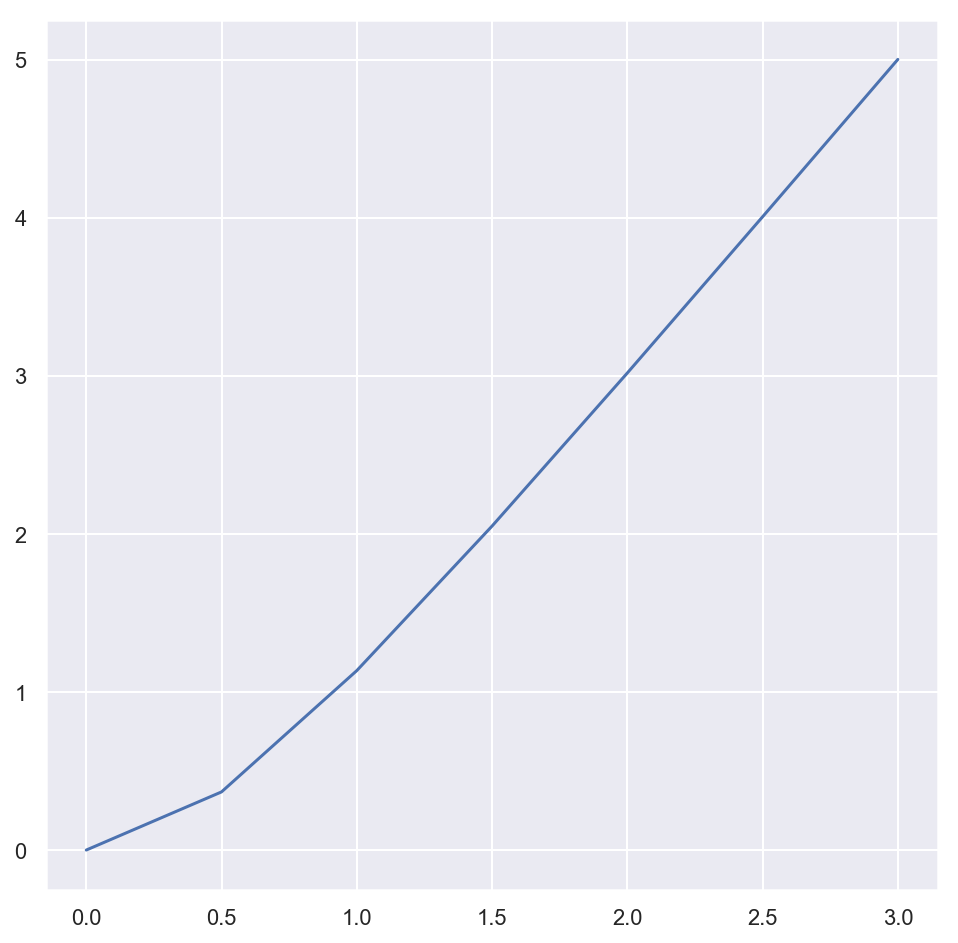

<function __main__.y_ivp_plot(y0, x0, xn, step)>

In [5]:
interact(y_ivp_plot,y0=(-10,10,1),x0=(-10,10,1),xn=(0,6,1),step=(0.01,1,0.01))

## Euler method
Euler's method is a numerical method to generate an approximate solution for given DE and IVP for it.

$x_{i+1} = x_{i}+h$

$y_{i+1} = y_i + hf(x_i,y_i)$

In [6]:
def euler_method(x0,y0,xn,step):
    y=[y0]
    x_arr = np.arange(x0,xn+step,step)
    error = []
    exact = []
    for x in x_arr:
        y_n = y[-1]+step*f(x,y[-1])
        error.append(y_ivp(x,x0,y0) - y[-1])
        y.append(y_n)
            
    return x_arr,y,error

def euler_method_plot(x0,y0,xn,step):
    x_arr,y,error = euler_method(x0,y0,xn,step)
    _,y_ex = exact(x0,y0,xn,step)
    plt.figure(figsize=(8,8))
    plt.plot(x_arr,y_ex,'--',label = 'Exact')
    plt.plot(x_arr,y[:len(x_arr)],label = 'Euler method')
    plt.plot(x_arr,error,'r', label = "Error")
    plt.title('Euler method')
    plt.legend()
    plt.show()

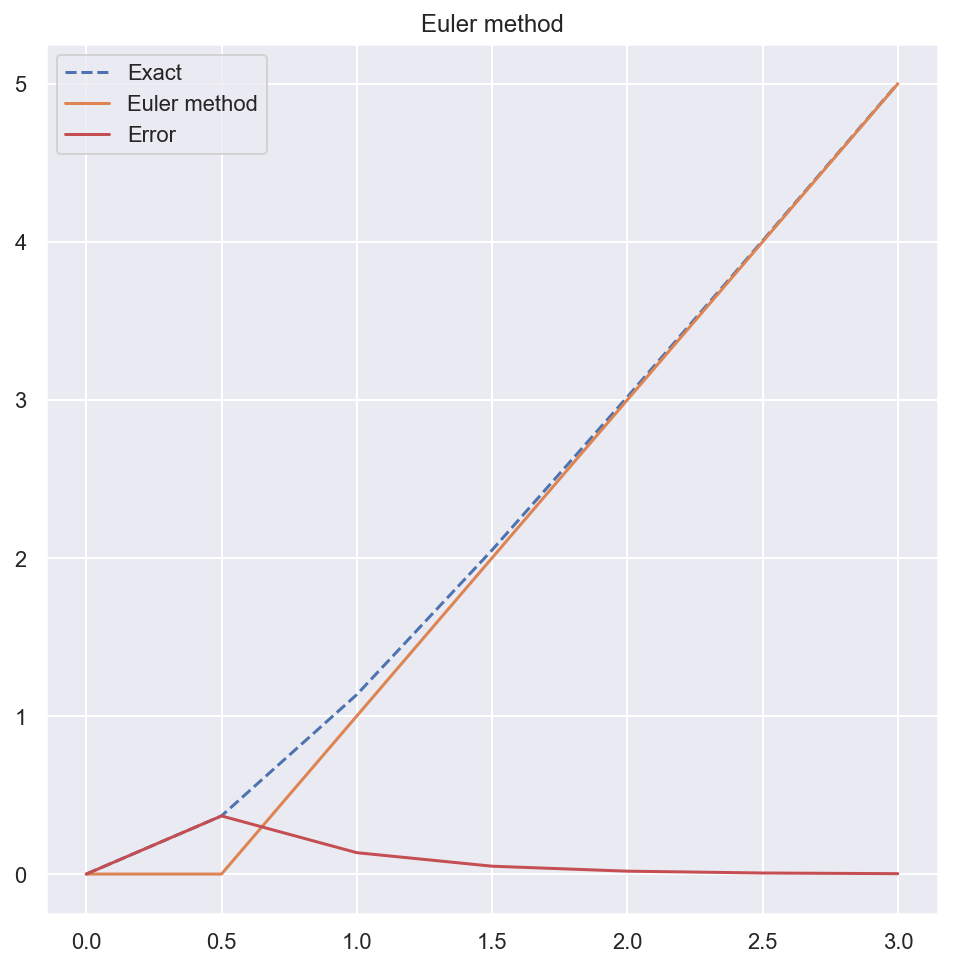

<function __main__.euler_method_plot(x0, y0, xn, step)>

In [7]:
interact(euler_method_plot,y0=(-10,10,1),x0=(-10,10,1),xn=(0,6,1),step=(0.01,1,0.01))

As we can see if we take step size smaller, then error becomes smaller. We can see that from the changing step size on the graph

## Improved Euler

The accuracy of the Euler method improves only linearly with the step size is decreased, whereas the Improved Euler Method improves accuracy quadratically 

$k_{1i}=f(x_i,y_i),$

$k_{2i}=f(x_i+h,y_i+hk_{1i}),$

$y_{i+1}=y_i+\frac{h}{2}(k_{1i}+k_{2i})$

In [8]:
def imp_euler(x0,y0,xn,step):
    y=[y0]
    x_arr = np.arange(x0,xn+step,step)
    error = []
    for x in x_arr:
        k1 = f(x,y[-1])
        k2 = f(x+step,y[-1]+step*k1)
        y_n = y[-1]+step*(k1+k2)/2
        error.append(y_ivp(x,x0,y0) - y[-1])
        y.append(y_n)
    return x_arr,y,error

def imp_euler_plot(x0,y0,xn,step):
    x_arr,y,error = imp_euler(x0,y0,xn,step)
    eu_x,eu_y,eu_error = euler_method(x0,y0,xn,step)
    _,y_ex = exact(x0,y0,xn,step)
    plt.figure(figsize=(8,8))
    plt.plot(x_arr,y_ex,'--',label = 'Exact')
    plt.plot(x_arr,y[:len(x_arr)],label = 'Improved Euler method')
    plt.plot(x_arr,error,'r', label = "Error")
    plt.title('Improved Euler method')
    plt.legend()
    plt.show()

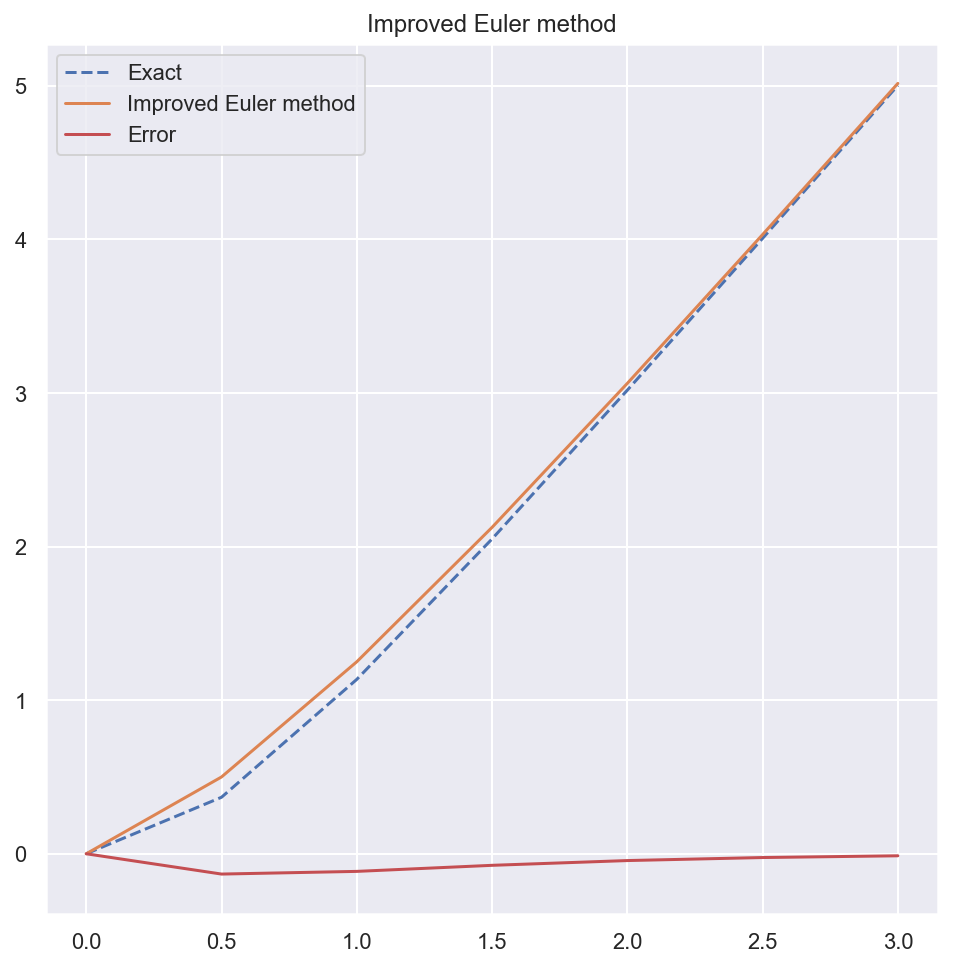

<function __main__.imp_euler_plot(x0, y0, xn, step)>

In [9]:
interact(imp_euler_plot,y0=(-10,10,1),x0=(-10,10,1),xn=(0,6,1),step=(0.01,1,0.01))

In compare with Euler's method, Improved Euler's method shows better results on bigger steps. On smaller step size we can see that error tends to zero and results become more precise as in Euler method

## Runge_Kutta method

There are many ways to evaluate the right-hand side that all agree to first order, but have different coefficients n higher-order error terms. Adding up the right combination of these, we can eleminate the error terms by order. That is the basic idea of the Runge-Kutta method. The fourth-order Runge-Kutta method requires four evaluations of the right-hand side per step.

$k_{1i} = f(x_i,y_i)$

$k_{2i} =f(x_i + \frac{h}{2},y_i+\frac{h}{2}k_{1i})$

$k_{3i} =f(x_i+\frac{h}{2},y_i+\frac{h}{2}k_{2i})$

$k_{4i} =f(x_i+h,y_i+hk_{3i})$

$y_{i+1} = y_i+\frac{h}{6}(k_{1i}+2k_{2i}+2k_{3i}+k_{4i})$

In [10]:
def runge_kutta(x0,y0,xn,step):
    y=[y0]
    x_arr = np.arange(x0,xn+step,step)
    error = []
    for x in x_arr:
        k1 = f(x,y[-1])
        k2 = f(x+step/2,y[-1]+step*k1/2)
        k3 = f(x+step/2,y[-1]+step*k2/2)
        k4 = f(x+step,y[-1]+step*k3)
        y_n = y[-1] + step*(k1+2*k2+2*k3+k4)/6
        error.append(y_ivp(x,x0,y0) - y[-1])
        y.append(y_n)
    return x_arr,y,error

def runge_kutta_plot(x0,y0,xn,step):
    x_arr,y,error = runge_kutta(x0,y0,xn,step)
    _,y_ex = exact(x0,y0,xn,step)
    plt.figure(figsize=(8,8))
    plt.plot(x_arr,y_ex,'--',label = 'Exact')
    plt.plot(x_arr,y[:len(x_arr)],label = 'Runge_Kutta method')
    plt.plot(x_arr,error,'r', label = "Error")
    plt.title('Runge_Kutta method')
    plt.legend()
    plt.show()

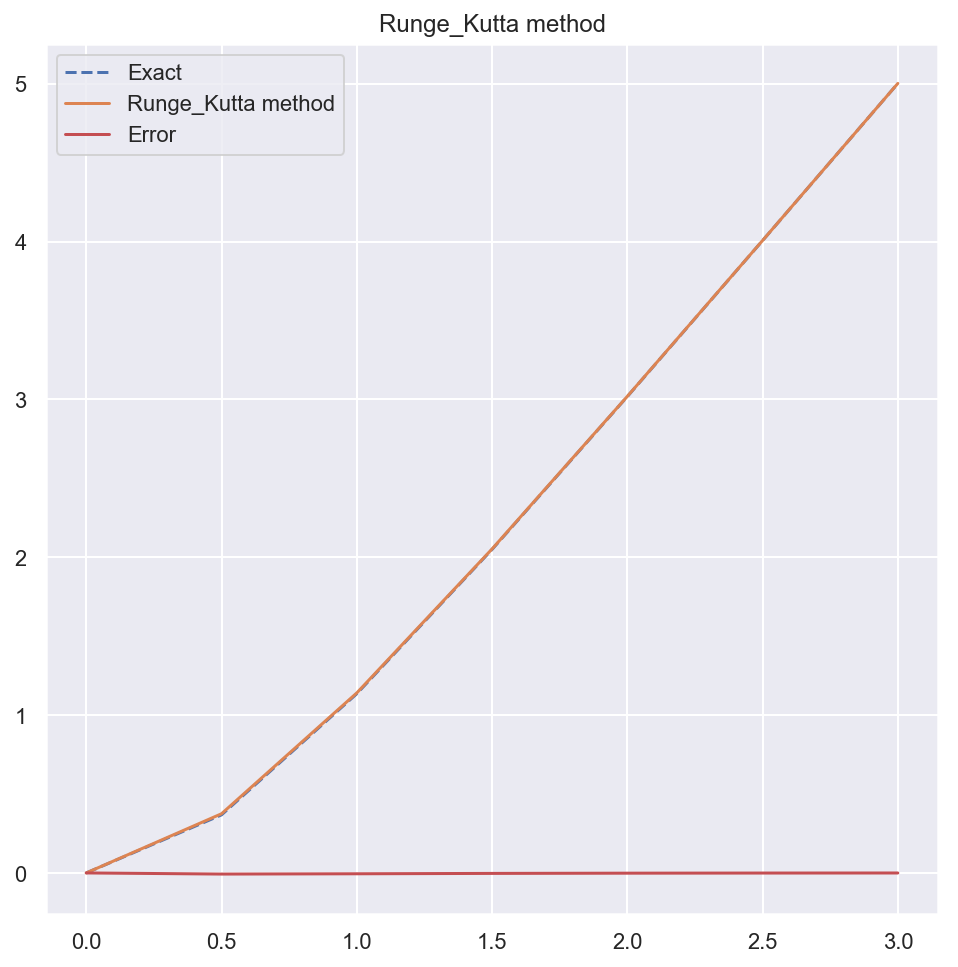

<function __main__.runge_kutta_plot(x0, y0, xn, step)>

In [11]:
interact(runge_kutta_plot,y0=(-10,10,1),x0=(-10,10,1),xn=(0,6,1),step=(0.01,1,0.01))

We can see that graph of Runge-Kutta method is particular the same as Exact solution

## Plots of all graphs

In [12]:
def all_methods_plot(x0,y0,xn,step):
    eu_x,eu_y,eu_error = euler_method(x0,y0,xn,step)
    imp_x,imp_y,imp_error = imp_euler(x0,y0,xn,step)
    rk_x,rk_y,rk_error = runge_kutta(x0,y0,xn,step)
    x_ex,y_ex = exact(x0,y0,xn,step)
    
   
    plt.figure(figsize=(10,10))
    plt.plot(x_ex,y_ex,label='Exact')
    plt.plot(eu_x,eu_y[:len(eu_x)],label='Euler')
    plt.plot(imp_x,imp_y[:len(imp_x)],label='Improved Euler')
    plt.plot(rk_x,rk_y[:len(rk_x)],label='Runge-Kutta')
    plt.legend()
    plt.title('All methods graph')
    plt.show()

   

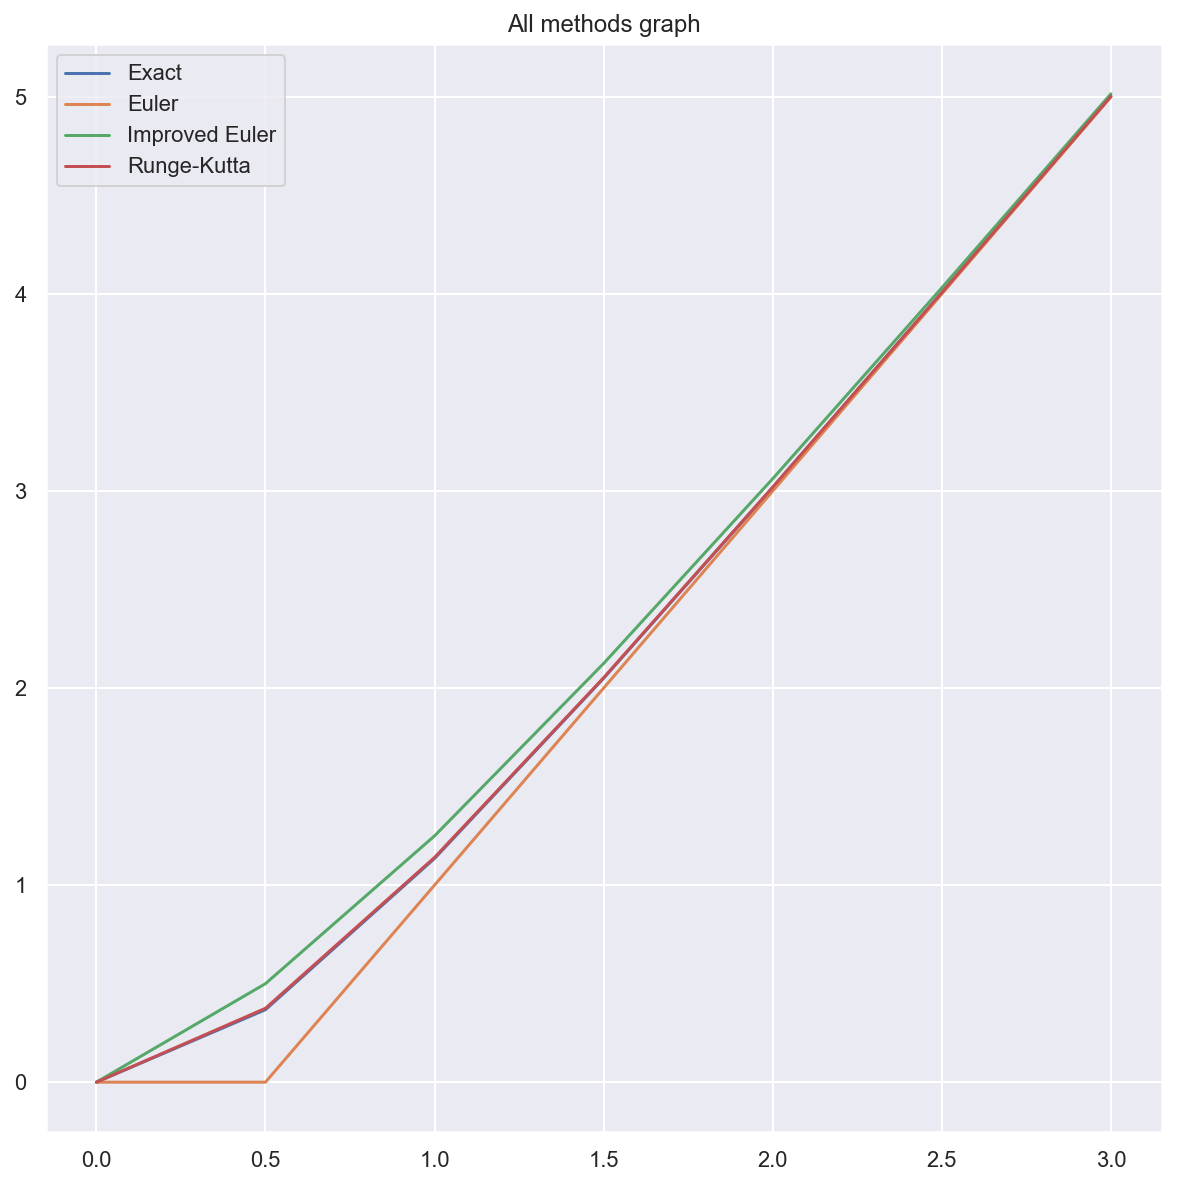

<function __main__.all_methods_plot(x0, y0, xn, step)>

In [13]:
interact(all_methods_plot,y0=(-10,10,1),x0=(-10,10,1),xn=(0,6,1),step=(0.01,1,0.01))

In [14]:
def all_local_errors(x0,y0,xn,step):
    eu_x,eu_y,eu_error = euler_method(x0,y0,xn,step)
    imp_x,imp_y,imp_error = imp_euler(x0,y0,xn,step)
    rk_x,rk_y,rk_error = runge_kutta(x0,y0,xn,step)
    
    plt.figure(figsize=(10,10))
    plt.plot(eu_x,eu_error,'--',label='Euler method error')
    plt.plot(imp_x,imp_error,'--',label='Improoved Euler method error')
    plt.plot(rk_x,rk_error,'--',label='Runge-Kutta method error')
    plt.legend()
    plt.title("Local errors")
    plt.show()

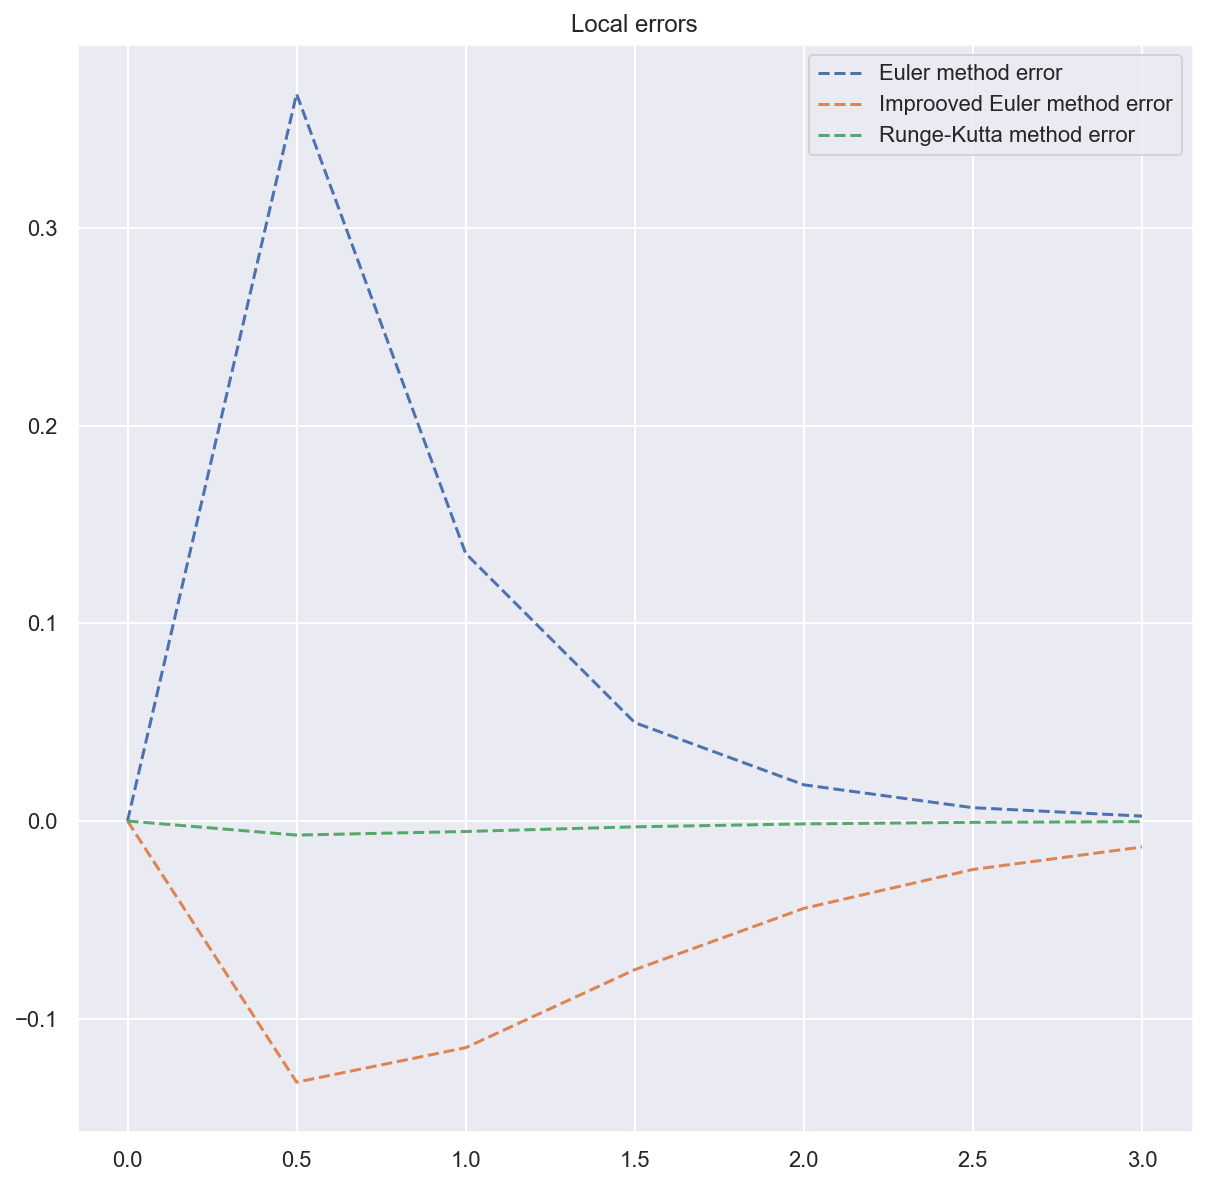

<function __main__.all_local_errors(x0, y0, xn, step)>

In [15]:
interact(all_local_errors,y0=(-10,10,1),x0=(-10,10,1),xn=(0,6,1),step=(0.01,1,0.01))

In [16]:
def global_error(x0,y0,xn,step):
    n = np.arange(1,int((xn-x0)/step)+1,1)
    eu_gl_e = []
    imp_gl_e = []
    rk_gl_e = []
    for i in n:
        x,y = exact(x0,y0,xn,(xn-x0)/i)
        _,eu_y,_ = euler_method(x0,y0,xn,(xn-x0)/i)
        _,imp_y,_ = imp_euler(x0,y0,xn,(xn-x0)/i)
        _,rk_y,_ = runge_kutta(x0,y0,xn,(xn-x0)/i)
        eu_gl_e.append((np.array(y)-np.array(eu_y[:len(y)])).sum())
        imp_gl_e.append((np.array(y)-np.array(imp_y[:len(y)])).sum())
        rk_gl_e.append((np.array(y)-np.array(rk_y[:len(y)])).sum())
    plt.figure(figsize=(8,8))    
    plt.plot(n,eu_gl_e,'.-',label='Euler method')
    plt.plot(n,imp_gl_e,'.-',label='Improved Euler method ')
    plt.plot(n,rk_gl_e,'.-',label='Runge-Kutta method')
    plt.title("Graph of Global Truncation Errors")
    plt.legend()
    plt.show()
    

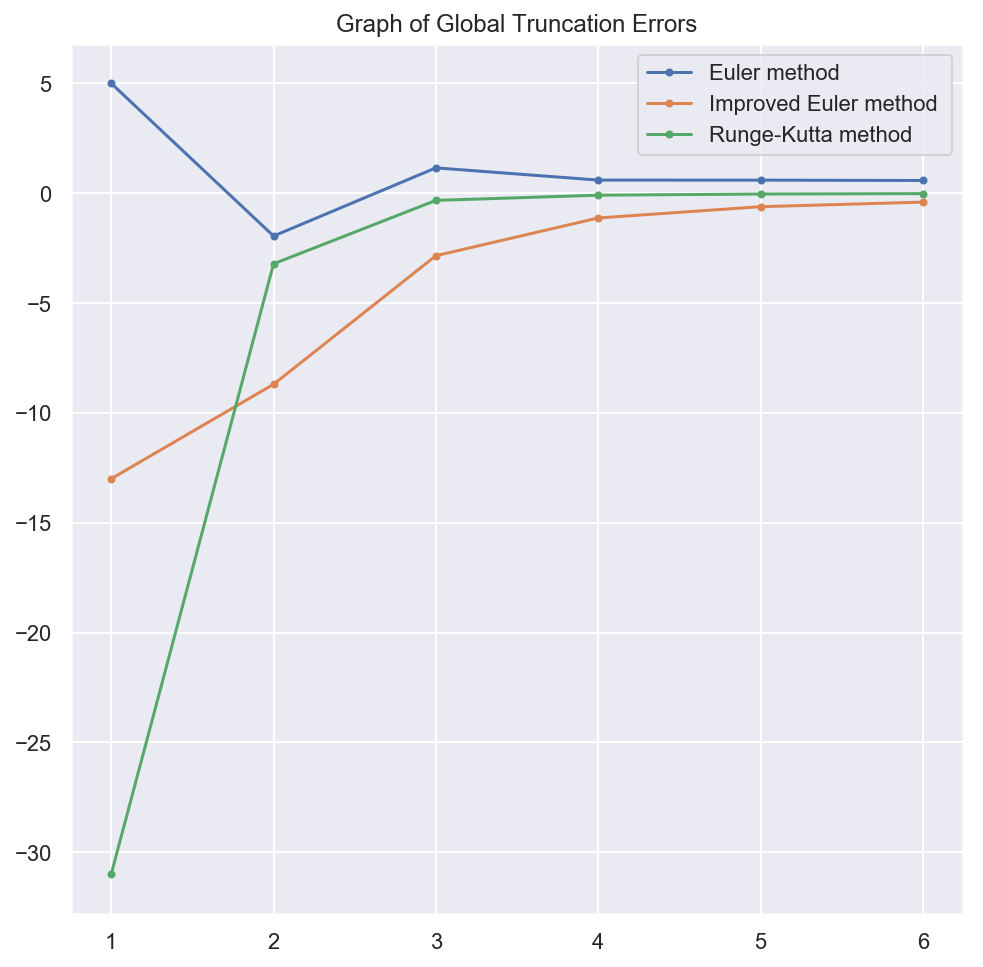

<function __main__.global_error(x0, y0, xn, step)>

In [17]:
interact(global_error,y0=(-10,10,1),x0=(-10,10,1),xn=(0,6,1),step=(0.01,1,0.01))